$\textbf{GOAL}$ Continuation of ``l_qut_1`` staying on **linear model** but with a non convex penalty, **$P_\nu$**.

Under sparse hypothesis, we want minimize with $\ell_0$ *(not a norm !)* penalty (the cardinal of the support) but it's discrete optimization and it's very hard. So on the first notebook, we see a relaxation $\ell_1$ with good property (convexity, sparsity, $\dots$). Nonetheless, it has some limits and we better results, so we choose a penalty, $P_\nu$, ""closer"" to $\ell_0$.

# Theory

## Penalty $Rational_\nu$

We consider a class of functions, named by *me* $Rational_\nu$ $\{P_\nu\}_{\nu \in ]0,1[}$ QUT-compatible to the loss function used (SR-LASSO in this notebook).  

We will show later the proof of this compatibility, i.e. $\lambda_0^{local}$ associated is not constant for a design matrix $X$ and random vector $Y$.

For $\nu \in ]0,1]$,

$$P_\nu : \theta \in \mathbb{R}^p \mapsto \sum_{i=1}^p \rho_\nu(\theta_i) \quad \text{with} \quad \rho_\nu : x \in \mathbb{R} \mapsto \frac{|x|}{1+|x|^{1-\nu}} $$

$Rational_\nu$ is continuous, differentiable except in 0, non-convex, locally lipschitz. Moreover, $\rho_\nu$ is even and ``for $ν=0$ it tends to the $ℓ_0$ discrete penalty for |θ| large``.

Then, with $\nu=1$, we get $\ell_1$ penalty as already done in ``l_qut_1`` notebook

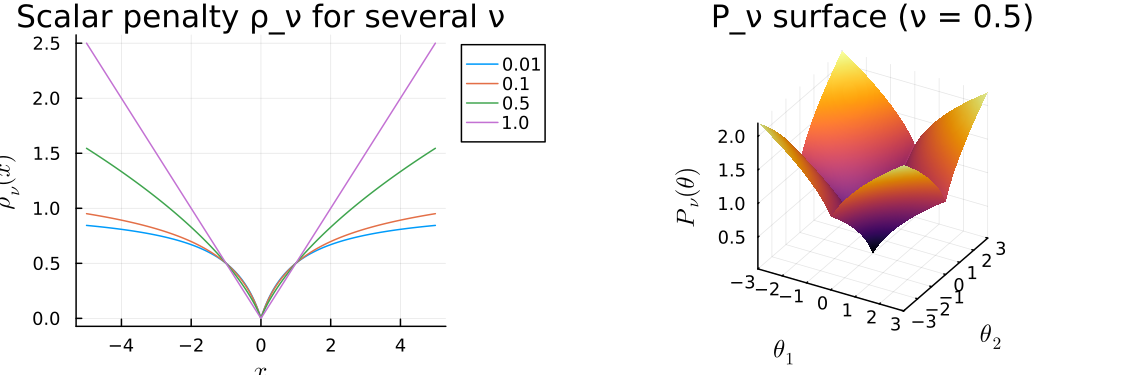

In [21]:
using Plots, LaTeXStrings
gr()

rho(ν, x) = abs(x) / (1 + abs(x)^(1 - ν))
Pν(ν, θ1, θ2) = rho(ν, θ1) + rho(ν, θ2)

xs  = range(-5, 5; length = 1000)
νs  = [0.01, 0.1, 0.5, 1.0]

plt2d = plot(; xlabel = L"x",ylabel = L"\rho_\nu(x)",title  = "Scalar penalty ρ_ν for several ν",legend = :outertopright, neatlegendtitle = L"\nu",legendfontsize = 8,dpi = 150)

for ν in νs
    plot!(plt2d, xs, x -> rho(ν, x), label = "$ν")
end

grid = range(-3, 3; length = 200)
ν     = 0.5
Z     = [Pν(ν, θ1, θ2) for θ2 in grid, θ1 in grid]

plt3d = surface(grid, grid, Z;xlabel = L"\theta_1",ylabel = L"\theta_2",zlabel = L"P_\nu(\theta)",title  = "P_ν surface (ν = $ν)",camera = (30, 30),legend = false)

plot(plt2d, plt3d; layout = (1, 2), size = (750, 250))


## Proximal

We will optimize $f+\lambda g$, with $f=RMSE$ and $g=P_\nu$ and even it's not a convex problem we use ISTA. We discuss about this later and we accept for the moment this choice.

In experiment we will take $\nu$ close to 0 and we need to get the proximal for $\nu \in ]0,1[$ because our penalty change from ``l_qut_1`` with an explicit expression ($\nu = 1$) called *soft thresholding*.

Remember we have, for $\gamma>0, \lambda>0$
$$
\emph{prox}_{\gamma, \lambda P_\nu} : z\in \mathbb{R}^p \mapsto \arg\min_{x\in\mathbb R^{p}}\;\Bigl\{\,\lambda P_\nu(x)+\tfrac1{2\gamma}\|x-z\|_2^2\Bigr\}
$$

By separability of the function inside the $\argmin$ and for $z\in \mathbb{R^p}$, $i\in \llbracket 1,p\rrbracket$

$$[\emph{prox}_{\gamma, \lambda P_\nu}(z)]_i = \arg\min_{x\in\mathbb R}\;
\underbrace{\Bigl\{\,\lambda \rho_\nu(x)+\tfrac1{2\gamma}(x-z)^2\Bigr\}}_{m(x;z)} $$

We need to compute this prox which is a real analysis problem and we explain by the proof on how to compute it.  
The following is strongly inspired by **Theorem 2.4**

For a given $z$, $m$ is continuous (as sum of continuous function on $\mathbb{R}) and is coercive. So the global minimum is a local minima so $0 \in \partial_x m(x;z)$  
(<span style="color:red"><b>TODO :</b></span> KKT ?)

$m$ is even so we restrict our analysis on $\mathbb{R}^+$, then $m$ is differentiable on $\mathbb{R}^{+*}$ with
$$m'(x;z) = \lambda \rho_\nu'(x) + \frac{x-z}{\gamma}, \quad \rho_\nu'(x) = \frac{1+\nu x^{1-\nu}}{\left(1+x^{1-\nu}\right)^2} $$

And in $0$ we can still calculate it's ""derivative"". $m$ is not convex so we can't use the sub-differential but we can consider a more general tool **Clarke sub differential** admits for local lipschitz function.
> Subgradients  
S. Boyd, J. Duchi, and L. Vandenberghe
Notes for EE364b, Stanford University, Spring 2014-15

Indeed, $m$ is local lispchitz because $|\rho_\nu'| \leq |\frac{1+x^{1-\nu}}{\left(1+x^{1-\nu}\right)^2}| \leq  1$ so $\rho_\nu$ is 1-Lipschitz. Then, $x \mapsto \frac{x-z}{\gamma}$ is $C^1$ so locally lipschitz and by sum we got the condition required to be locally lipschitz.



We pass all the theory but for stationnary point we have still $0$ in the interval and the subdifferential is given for the interest point $x$ (for simplicity we stay on $\mathbb{R}$) by the limit from the left and the right. In our case,

$$\partial m(0;z) = \lambda \Bigl[\lim_{x\to0^{-}} \rho_\nu'(0;z); \lim_{x\to0^{+}} \rho_\nu'(0;z)\Bigr] + \{ \frac{x-z}{\gamma}\}$$
By parity,
$$\partial m(0;z) = \lambda\Bigl[\pm lim_{x\to 0^+} \rho_\nu'(x) \Bigr]  + \{\frac{x-z}{\gamma}\}$$
and because 
$\lim_{x\to0^{+}}\rho_\nu'(x)=
\begin{cases}
\dfrac12 & \text{si } \nu=1\\
1 & \text{si } 0<\nu<1
\end{cases}
$

$$\partial m(0;z) =
\begin{cases}
\Bigl[\pm \dfrac{\lambda}{2}-\dfrac{z}{\gamma}\Bigr] & \text{if } \nu=1\\[6pt]
\Bigl[\pm \lambda-\dfrac{z}{\gamma}\Bigr] & \text{if } 0<\nu<1
\end{cases}$$

Hence, $$0\in \partial m(0;z) \Longleftrightarrow \begin{cases}
|z|\leq \frac{1}{2}\lambda \gamma
& \text{if } \nu=1\\[6pt]
|z|\leq \lambda \gamma
& \text{if } 0<\nu<1
\end{cases}$$

So we have at most 2 candidates and we need to known which one choose. We remark if $|z|> \lambda \gamma$ then $0$ is no longer a candidate but it will be useless as information because we will find a "narrow exclusion" for $x=0$. 


Let $H_z$ and we want to see when it's negative or positive.  $$H_z(x) := m(x;z) - m(0;z) = \frac{1}{2\gamma}(x^2-2xz+z^2) + \lambda\rho_\nu(x) - \frac{z^2}{2\gamma}  =  \frac{1}{2\gamma}(x^2-2xz) + \lambda\rho_\nu(x) $$

We have $H_z(0) = 0$ so we have to know how goes $H_z$ (its "direction"). We derive and denote by $G$,
$$H_z'(x) = \frac{1}{\gamma}(x-z) + \lambda \rho_\nu'(x)=:G(x)-\frac{z}{\gamma}$$

So to know how $H_z'$ behaves we need to know how behves $G$,

$$G'(x) = \frac{1}{\gamma} + \lambda \rho_\nu''(x) = \frac{1}{\gamma} + (1-\nu)\nu \frac{1-x^{1-\nu}}{x^\nu(1+x^{1-\nu})^3} > 0$$

Then $G$ is strictly increasing and $G(0^+)=\lambda$, we got again that if $|z|\leq \lambda\gamma$ then $H_z'(x)\neq 0$ so $H_z>0$, indeed we see $H(\infty) > 0$ and by continuity it stays positive, so $x=0$ is solution.

We consider hence the case $z>\lambda\gamma$ (and the negative case is symmetric).  
So for this case by strict increasing and continuity (Theorem intermediate value) there exists $\kappa$ such that $$G(\kappa)=\frac{z}{\gamma} \Longleftrightarrow \frac{\kappa}{\gamma} + \lambda\frac{1+\nu\kappa^{1-\nu}}{(1+\kappa^{1-\nu})^2} = \frac{z}{\gamma} \Longleftrightarrow \kappa + \lambda\gamma\frac{1+\nu\kappa^{1-\nu}}{(1+\kappa^{1-\nu})^2} = z$$

That's to say we now have a stationary candidate and then to check whether the solution switches from 0 to $\kappa$, we evaluate directly,
$$
H_z(\kappa) = \frac{1}{2\gamma}(\kappa^2 - 2\kappa z) + \lambda\rho_\nu(\kappa)
$$

We use the expression of $z$ got,
$$
H_z(\kappa) = \frac{1}{2\gamma}\left(\kappa^2 - 2\kappa\left[\kappa + \lambda\gamma\rho_\nu'(\kappa)\right]\right) + \lambda\rho_\nu(\kappa)
= -\frac{\kappa^2}{2\gamma} - \lambda\kappa\rho_\nu'(\kappa) + \lambda\rho_\nu(\kappa)
$$
<span style="color:red"><b>TODO :</b></span> Pourquoi pas > 0 ? faire un tableau de vairation explicite en latex

Now, the sign of $H_z(\kappa)$ tells us if the minimizer is at $0$ or at $\kappa$,

* If $H_z(\kappa)<0$, then $\kappa$ gives a strictly lower cost than $0$, and thus $\kappa$ becomes the global minimizer.
* If $H_z(\kappa)=0$, the two solutions have equal costs; this is exactly the **threshold condition**.

Setting explicitly the threshold condition $H_z(\kappa)=0$, we have the equation:

$$
-\frac{\kappa^2}{2\gamma} - \lambda\kappa\rho_\nu'(\kappa) + \lambda\rho_\nu(\kappa)=0.
$$

Multiplying by $\frac{2\gamma(1+\kappa^{1-\nu})^2}{\kappa}$ to simplify clearly, we directly recover the simplified threshold equation from the paper:

$$
\kappa^{2-\nu} + 2\kappa + \kappa^\nu + 2\gamma\lambda(\nu - 1) = 0.
$$

We thus have the final **threshold rule** explicitly:

* If $|z|\leq\lambda\gamma$, then the minimizer is $0$.
* If $|z|>\lambda\gamma$, solve the above equation to find $\kappa$, and the minimizer is $\pm\kappa$. <span style="color:red"><b>TODO :</b></span> s'assurer que c'est pas 0.

<span style="color:red"><b>TODO :</b></span> Parler de dichotmie et newton pour la résolution numérique


<span style="color:red"><b>TODO :</b></span> explain the sign + imrpvoe notaiton for argument in kappa

The explicit proximal solution is hence clearly given by:

$$
\eta_{\lambda,\nu,\gamma}(z)=
\begin{cases}
0, & |z|\leq\lambda\gamma\\[4pt]
\operatorname{sign}(z)\,\kappa(|z|), & |z|>\lambda\gamma,
\end{cases}
$$

where $\kappa(|z|)$ is the unique positive solution of the stationary equation provided above.


